In [1]:
import sys

sys.path.append('..')

from flod.classifiers.bsvclassifier import BSVClassifier

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer, confusion_matrix, accuracy_score
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
import numpy as np

plt.rcParams["figure.figsize"] = (15, 6)

# Let's see the performances in the training set

In [3]:
from joblib import dump, load
clf = load('iris.joblib')

In [4]:
print(f'Q: {clf.q}')
print(f'C: {clf.c}')

Q: 7
C: 0.75


In [5]:
X = clf.X_
y = clf.y_
y_test = clf.y_
y_pred = clf.predict(clf.X_)

print(f'Precision {precision_score(y_test, y_pred)}')
print(f'Recall {recall_score(y_test, y_pred)}')
print(f'F1 {f1_score(y_test, y_pred)}')
print(f'Accuracy {accuracy_score(y_test, y_pred)}')

Precision 1.0
Recall 0.9393939393939394
F1 0.96875
Accuracy 0.98


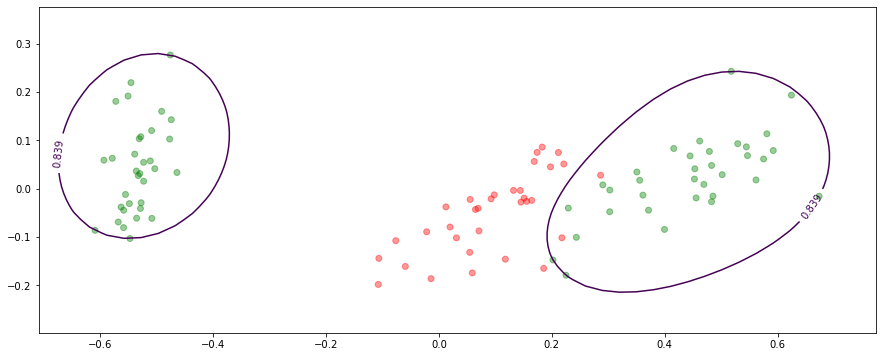

In [6]:
colors = ['green' if i == 0 else 'red' for i in y]

gx = np.linspace(min(X[:,0])-.1, max(X[:,0])+.1, 50)
gy = np.linspace(min(X[:,1])-.1, max(X[:,1])+.1, 50)
gX, gY = np.meshgrid(gx, gy)
zs = np.array([clf._compute_r(np.array([x, y])) for x, y in zip(np.ravel(gX), np.ravel(gY))])
gZ = zs.reshape(gX.shape)
membership_contour = plt.contour(gX, gY, gZ, levels=(clf.radiuses_[clf.sv_i], ))
plt.clabel(membership_contour, inline=1)

plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=.4)

plt.show()

In [7]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()

print(f'TP: {tp} FP: {fp} FN: {fn} TN: {tn}')

TP: 31 FP: 0 FN: 2 TN: 67


## Let's see how are the beta values distrubuted

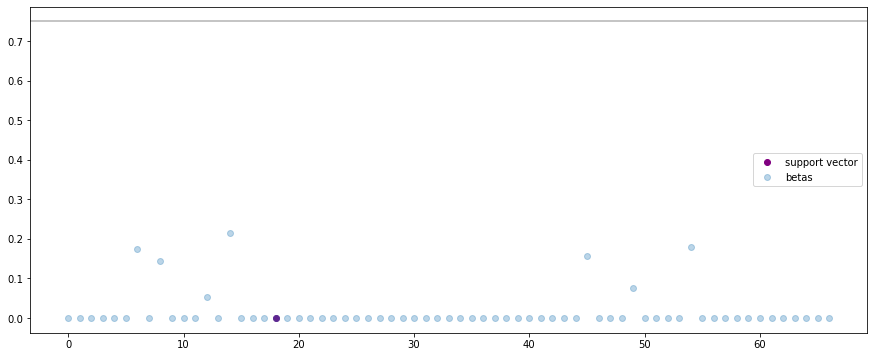

In [12]:
plt.plot(clf.sv_i, clf.betas_[clf.sv_i], 'o', c='purple', label = 'support vector', alpha=1)
plt.plot(clf.betas_, 'o', alpha=.3, label='betas')
plt.axhline(clf.c, color='black', alpha=.3)
plt.legend()
plt.show()

In [9]:
print(f'Sum betas {sum(clf.betas_)} Negative betas {len([1 for b in clf.betas_ if b < 0])}')

Sum betas 1.000000000001252 Negative betas 0


## Let's see the distribution of the radiuses

In [10]:
colors = ['red' if y == 1 else 'green' for y in clf.y_]

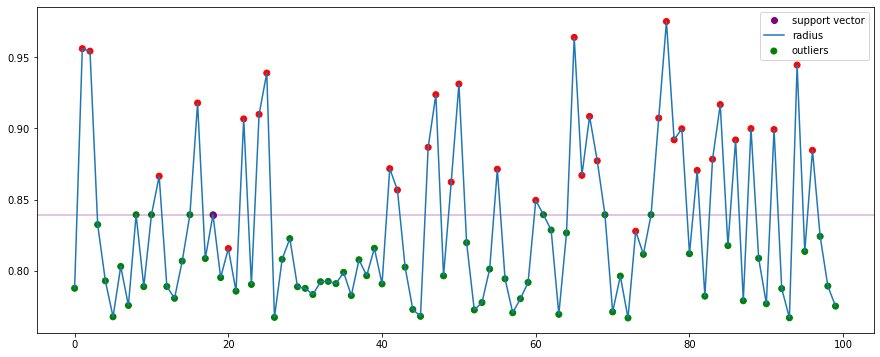

In [11]:
plt.axhline(clf.radiuses_[clf.sv_i], color='purple', alpha=.3)
plt.plot(clf.sv_i, clf.radiuses_[clf.sv_i], 'o', c='purple', label = 'support vector', alpha=1)
plt.scatter(range(len(clf.radiuses_)), clf.radiuses_, c=colors, label='outliers', alpha=1)
plt.plot(clf.radiuses_, label='radius')
plt.legend()
plt.show()